### **Question 3**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sn
import joblib
import cv2 as cv
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from matplotlib import colors as cma
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
X_train = pd.read_csv('/Users/varishgrover/Desktop/College/Semester5/ML/Assignment4/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
y_train = pd.read_csv('/Users/varishgrover/Desktop/College/Semester5/ML/Assignment4/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
X_test = pd.read_csv('/Users/varishgrover/Desktop/College/Semester5/ML/Assignment4/UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)
y_test = pd.read_csv('/Users/varishgrover/Desktop/College/Semester5/ML/Assignment4/UCI HAR Dataset/test/y_test.txt',delim_whitespace=True,header=None)

In [3]:
train = pd.concat([X_train, y_train], axis = 1)

In [4]:
y_train = train.iloc[:, -1].to_numpy()

In [5]:
X_train = train.iloc[:, :-1].to_numpy()

In [6]:
# y_train = y_train - 1
# y_test = y_test - 1

### **Load the dataset and visualize through tsne. (5 points)**

In [7]:
# tsne = TSNE(n_components=2)
# tsne_results_2D = tsne.fit_transform(X_train)
# joblib.dump(tsne_results_2D, '/Users/varishgrover/Desktop/College/Semester5/ML/Assignment4/Q3SavedObjects/TSNE.pkl')

In [8]:
tsne_results_2D = joblib.load('/Users/varishgrover/Desktop/College/Semester5/ML/Assignment4/Q3SavedObjects/TSNE.pkl')

[]

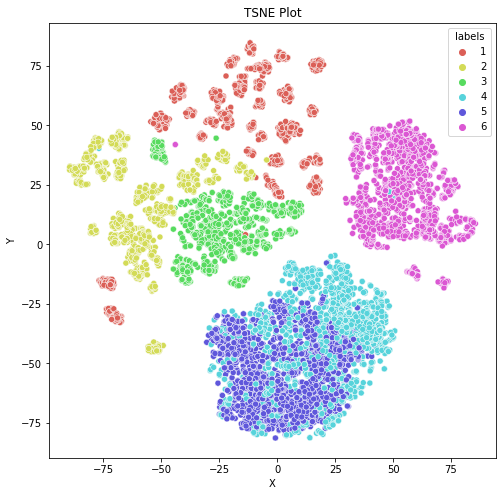

In [9]:
df = pd.DataFrame()
df['X'] = tsne_results_2D[:,0]
df['Y'] = tsne_results_2D[:,1]
df['labels'] = y_train
plt.figure(figsize=(8,8))
sn.scatterplot(x="X", y="Y",palette=sn.color_palette("hls", len(df['labels'].unique())), hue="labels",data=df,legend="full",)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("TSNE Plot")
plt.plot()

### **Implement the Kmeans algorithm from scratch. You need to find the optimal number of clusters using the elbow method. Plot the error vs number of clusters graph while using the elbow method. Report the optimal number of cluster found. (35 points)**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.cluster import homogeneity_score
from sklearn.manifold import TSNE
%matplotlib inline

In [11]:
class Kmeans_Custom(object):
    def __init__(self, k, max_itrs):
        self.K = k 
        self.max_itrs = max_itrs
        self.centroids = None

    def fit(self,data):
        self.centroids = np.array(data[np.random.choice(range(data.shape[0]), replace = False, size = self.K), :])
        for i in range(self.max_itrs):
            self.clusters = {c :[] for c in range(self.K)}
            distances = self.rss(data,self.centroids)
            pred_clusters = np.argmin(distances,axis=1)
            self.clusters = {c: data[np.where(pred_clusters==c)] for c in range(self.K)}
            prev = self.centroids.copy()
            for c in self.clusters: self.centroids[c] = np.mean(self.clusters[c],axis=0)
            early_stop = True
            for c in range(self.K):
                if np.sum(np.abs(self.centroids[c]-prev[c])) > 1:
                    early_stop = False
                    break
            if early_stop:
                break  
        return self
    
    def predict(self, X_test):
        return np.array(np.argmin(self.rss(X_test, self.centroids), axis=1))
    
    def rss(self, p1, p2):
        dist=np.array([]).reshape(p1.shape[0],0)
        for k in range(self.K):
            dist=np.c_[dist,np.sum((p1-p2.T[:,k])**2,axis=1)]
        return dist

Done K = 1
Done K = 2
Done K = 3
Done K = 4
Done K = 5
Done K = 6
Done K = 7
Done K = 8
Done K = 9
Done K = 10
Done K = 11
Done K = 12
Done K = 13
Done K = 14
Done K = 15
Done K = 16
Done K = 17
Done K = 18
Done K = 19


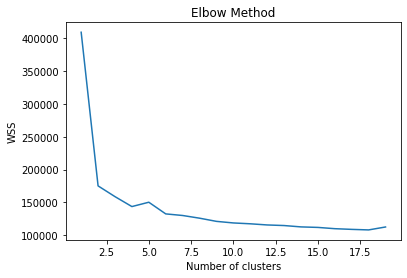

In [12]:
def elbow_method():
    wss = []
    for k in range(1,20):
        print("Done K =", k)
        kmeans = Kmeans_Custom(k,300).fit(X_train)
        centroids, pred, sse = kmeans.centroids, kmeans.predict(X_train), 0
        for i in range(len(X_train)):
            sse += np.sum((X_train[i] - centroids[pred[i]]) ** 2)
        wss.append(sse)
    return wss

wss = elbow_method()
plt.plot(range(1,20), wss, markersize=5,markerfacecolor='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

To determine the optimal number of clusters, we have to select the value of K at the “elbow” i.e. the point after which the inertia starts decreasing in a linear fashion. It is evident from the graph that from K = 6 onwards the inertia starts decreasing almost linearly, and thus **optimal K = 6**.

### **Use Scatter plot to visualize the dataset to depict the clusters formed(optimal). (10 points)**

In [38]:
OPTIMAL = 6
myk0 = Kmeans_Custom(OPTIMAL, 40).fit(X_train)
y_pred_scratch = myk0.predict(X_train)

[]

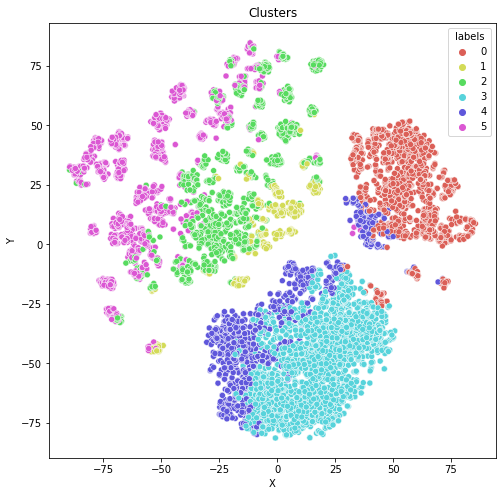

In [39]:
df = pd.DataFrame()
df['X'] = tsne_results_2D[:,0]
df['Y'] = tsne_results_2D[:,1]
df['labels'] = y_pred_scratch
plt.figure(figsize=(8,8))
sn.scatterplot(x="X", y="Y",palette=sn.color_palette("hls", len(df['labels'].unique())), hue="labels",data=df,legend="full",)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusters")
plt.plot()

### **Report the training and the test set accuracy. Comment on the accuracy obtained for both the sets. Compare with sklearn. (10 points)**

In [40]:
y_pred_scratch = myk0.predict(X_train)
print("Train accuracy:")
cm = confusion_matrix(y_train, y_pred_scratch)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred_scratch])
print(accuracy_score(y_train,y_pred_))

y_pred_scratch = myk0.predict(X_test)
print("Test accuracy:")
cm = confusion_matrix(y_test, y_pred_scratch)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred_scratch])
print(accuracy_score(y_test,y_pred_))

Train accuracy:
0.5821545157780196
Test accuracy:
0.6090939938920936


# Average accuracies for 20 runs

In [45]:
test_acc, train_acc = [], []
for g in range(20):
    OPTIMAL = 6
    myk0 = Kmeans_Custom(OPTIMAL, 100).fit(X_train)
    y_pred_scratch = myk0.predict(X_train)
    y_pred_scratch = myk0.predict(X_train)
    cm = confusion_matrix(y_train, y_pred_scratch)
    cm_argmax = cm.argmax(axis=0)
    y_pred_ = np.array([cm_argmax[i] for i in y_pred_scratch])
    train_acc.append(accuracy_score(y_train,y_pred_))
    y_pred_scratch = myk0.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_scratch)
    cm_argmax = cm.argmax(axis=0)
    y_pred_ = np.array([cm_argmax[i] for i in y_pred_scratch])
    test_acc.append(accuracy_score(y_test,y_pred_))
    print("Done", g)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16
Done 17
Done 18
Done 19


In [46]:
print("Average testing accuracy:-", np.mean(np.array(test_acc)) )
print("Average training accuracy:-", np.mean(np.array(train_acc)))

Average testing accuracy:- 0.6132846963013233
Average training accuracy:- 0.5953686071817194


**Additional: K = 20**

For the purpose of evaluation, we find the best perumatation of matching between predicted cluster labels and original ground truth labels, this is done by manipulating the confusion matrix a bit to shift the max entries to the diagonal. This corresponds to finding the best linear arrangement

In [16]:
myk0 = Kmeans_Custom(10, 40).fit(X_train)
y_pred_scratch = myk0.predict(X_train)
print("Train accuracy:")
cm = confusion_matrix(y_train, y_pred_scratch)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred_scratch])
print(accuracy_score(y_train,y_pred_))

y_pred_scratch = myk0.predict(X_test)
print("Test accuracy:")
cm = confusion_matrix(y_test, y_pred_scratch)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred_scratch])
print(accuracy_score(y_test,y_pred_))

Train accuracy:
0.7368063112078346
Test accuracy:
0.7570410587037666


### **Inbuilt Implementation**

Done K = 1
Done K = 2
Done K = 3
Done K = 4
Done K = 5
Done K = 6
Done K = 7
Done K = 8
Done K = 9
Done K = 10
Done K = 11
Done K = 12
Done K = 13
Done K = 14
Done K = 15
Done K = 16
Done K = 17
Done K = 18
Done K = 19
Done K = 20
Done K = 21
Done K = 22
Done K = 23
Done K = 24
Done K = 25
Done K = 26
Done K = 27
Done K = 28
Done K = 29


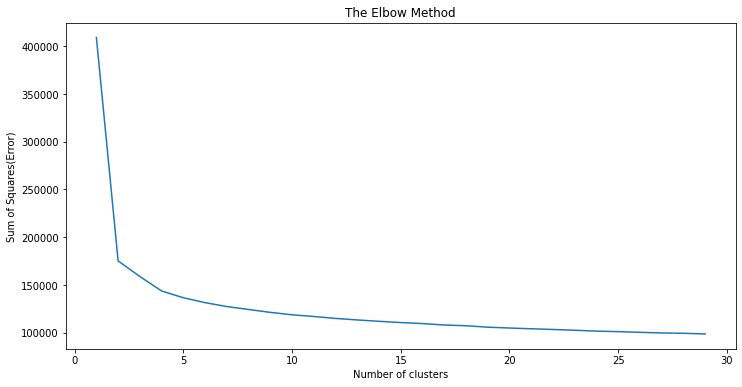

In [17]:
temp = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_train)
    temp.append(kmeans.inertia_)
    print("Done K =", i)
plt.figure(figsize=(12,6))
plt.plot(range(1, 30), temp)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares(Error)')
plt.show()

In [18]:
kmeans_inbuilt = KMeans(n_clusters = 6)
y_pred_inbuilt = kmeans_inbuilt.fit_predict(X_train)

[]

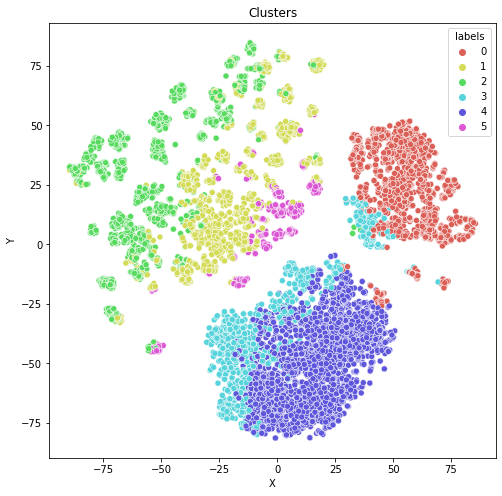

In [19]:
df = pd.DataFrame()
df['X'] = tsne_results_2D[:,0]
df['Y'] = tsne_results_2D[:,1]
df['labels'] = y_pred_inbuilt
plt.figure(figsize=(8,8))
sn.scatterplot(x="X", y="Y",palette=sn.color_palette("hls", len(df['labels'].unique())), hue="labels",data=df,legend="full",)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusters")
plt.plot()

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_inbuilt)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred_inbuilt])
accuracy_score(y_train,y_pred_)

0.5802502720348205

In [21]:
y_pred = kmeans_inbuilt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred])
accuracy_score(y_test,y_pred_)

0.6084153376314897

Additional K = 10

In [22]:
kmeans_inbuilt = KMeans(n_clusters = 10)
y_pred_inbuilt = kmeans_inbuilt.fit_predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_inbuilt)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred_inbuilt])
print("Training Accuracy", accuracy_score(y_train,y_pred_))
y_pred = kmeans_inbuilt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred])
print("Testing Accuracy", accuracy_score(y_test,y_pred_))

Training Accuracy 0.7087867247007617
Testing Accuracy 0.7349847302341365


The results of SKlearn implementation and custom implementation are quite comparable, and around the same range. The accuracies are in the range of 60% for both training and testing data in both inbuilt and custom implementations, for optimal K = 6. Even for larger values of k =10, the inbuilt and custom implementations produce comparable results. 